<a href="https://colab.research.google.com/github/Yousefsame7/sentiment_analysis_RNN_/blob/main/sentiment_analysis_RNN_(1)_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import gensim
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense
import nltk
from nltk.corpus import stopwords
from keras.callbacks import EarlyStopping
from nltk.stem import WordNetLemmatizer
import string

In [16]:
import os

# Set the environment variable for Kaggle configuration
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

# Download the Kaggle dataset using 'kaggle datasets download'
!kaggle datasets download -d bhavikardeshna/amazon-customerreviews-polarity

# Unzip the dataset
!unzip 'amazon-customerreviews-polarity.zip'


amazon-customerreviews-polarity.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  amazon-customerreviews-polarity.zip
  inflating: test.csv                
  inflating: train.csv               


In [17]:
!kaggle datasets download -d bhavikardeshna/amazon-customerreviews-polarity

amazon-customerreviews-polarity.zip: Skipping, found more recently modified local copy (use --force to force download)


In [18]:
column_names = ['label', 'title', 'review']
df = pd.read_csv(r'/content/train.csv', names=column_names)

In [19]:
df.head()

,label,title,review
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [20]:
new_df= df.sample(n=1000000, random_state=42)
new_df.dropna(inplace=True)
new_df.label.value_counts()
new_df['label'] = new_df['label'].map({1: 0, 2: 1})
new_df.head()

,label,title,review
2079998,0,Expensive Junk,This product consists of a piece of thin flexi...
1443106,0,Toast too dark,"Even on the lowest setting, the toast is too d..."
3463669,1,Excellent imagery...dumbed down story,I enjoyed this disc. The video is stunning. I ...
2914699,0,Are we pretending everyone is married?,The authors pretend that parents neither die n...
1603231,0,Not worth your time,"Might as well just use a knife, this product h..."


In [21]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in text.split()]

    # Tokenize the text
    tokens = tokenizer.texts_to_sequences([' '.join(tokens)])[0]

    # Pad the sequence to a fixed length (adjust max_sequence_length as needed)
    max_sequence_length = 100  # Adjust as needed
    padded_sequence = pad_sequences([tokens], maxlen=max_sequence_length, padding='post')[0]

    return padded_sequence

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [22]:
new_df['final'] = new_df['title'] + " " + new_df['review']
new_df.final.iloc[500]

"Still working fine after 7+ years!!! I've had this TV since August 2003 for $3100 CDN. I am writing this now in June 2011. I have never had to replace the lamp and it's still working fine. It is my main TV and I would guess that I watch on average 2 hours a day (conservative estimate). that's over 5600 hours.I've noticed over the past few months the warm-up period of it turning on is getting longer; probably signs that I will need to buy a new lamp. Buying a new lamp off of ebay for $125 Canadian.I know there are a lot of reviews giving it a bad rating, but I really can't complain. I got my moneys worth and the picture is still really good. I have a blu-ray player with DVI connected to it and looks great. I really wonder how long I'll keep the TV since the technology is getting old. Maybe I'll move it to the bedroom when I can't resist buying a new slimmer LED TV."

In [23]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(new_df['final'])

In [24]:
new_df['final'] = new_df['final'].apply(preprocess_text)

In [25]:
new_df.final.iloc[500]

array([    6,  1623,    18,     9,   278,   534,   314,  2577,    12,
           3,    47,   186,     5,    81,     4,   102,  2950,   309,
           4,   102,  2950,   119,     7,  3822,    11,  9766,   123,
          56,    23,     4,   176,     7,   258,   771,     6,     4,
         127,   917,    16,     3,    63,  1289,  2555,     3,   125,
          21,   113,   161,     2,     1,   394,     9,   126,    63,
          31,     3,    20,     4,  5583,   435,    17,  8648,  2151,
           5,     6,     2,   200,    29,     3,    63,   814,    85,
         171,  2799,   243,     1,   422,   191,     1,  1799,     9,
         278,   133,   304,  2799,   736,     6,     5,     1,  3319,
          48,     3,  1289,  6146,   309,     4,   102, 18869,  1711,
         422], dtype=int32)

In [26]:
new_df.head()

,label,title,review,final
2079998,0,Expensive Junk,This product consists of a piece of thin flexi...,"[652, 611, 8, 83, 4864, 7, 4, 363, 7, 928, 395..."
1443106,0,Toast too dark,"Even on the lowest setting, the toast is too d...","[3639, 82, 696, 71, 18, 1, 3843, 923, 1, 3639,..."
3463669,1,Excellent imagery...dumbed down story,I enjoyed this disc. The video is stunning. I ...,"[188, 163, 104, 3, 360, 8, 562, 1, 277, 9, 247..."
2914699,0,Are we pretending everyone is married?,The authors pretend that parents neither die n...,"[23, 73, 8533, 407, 9, 2478, 1, 223, 5072, 12,..."
1603231,0,Not worth your time,"Might as well just use a knife, this product h...","[14, 161, 58, 55, 301, 4, 67, 35, 90, 4, 1281,..."


In [27]:
# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
max_words = len(tokenizer.word_index) + 1  # Vocabulary size
max_sequence_length = 100
X_train, X_test, y_train, y_test = train_test_split(new_df.final, new_df.label	, test_size=0.1, random_state=42)

In [29]:
learning_rate = 0.0005
optimizer = Adam(learning_rate=learning_rate)
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=300, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(units=32)))
model.add(Dense(1, activation='sigmoid'))

# Compile the Bidirectional LSTM model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
loaded_model = load_model('/content/drive/MyDrive/RNN_sentiment_analysis/my_rnn_model.keras')

In [ ]:
batch_size = 128
epochs = 10
history = model.fit(np.array(X_train.tolist()), np.array(y_train),
                        batch_size=batch_size, epochs=epochs,
                        validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
1054/5625 [====>.........................] - ETA: 5:14:17 - loss: 0.3126 - accuracy: 0.8671

In [ ]:
# Specify the full path for saving the model in Keras format
model_keras_filename = '/content/drive/MyDrive/RNN_sentiment_analysis/my_rnn_model.keras'

# Save the model in Keras format
model.save(model_keras_filename)

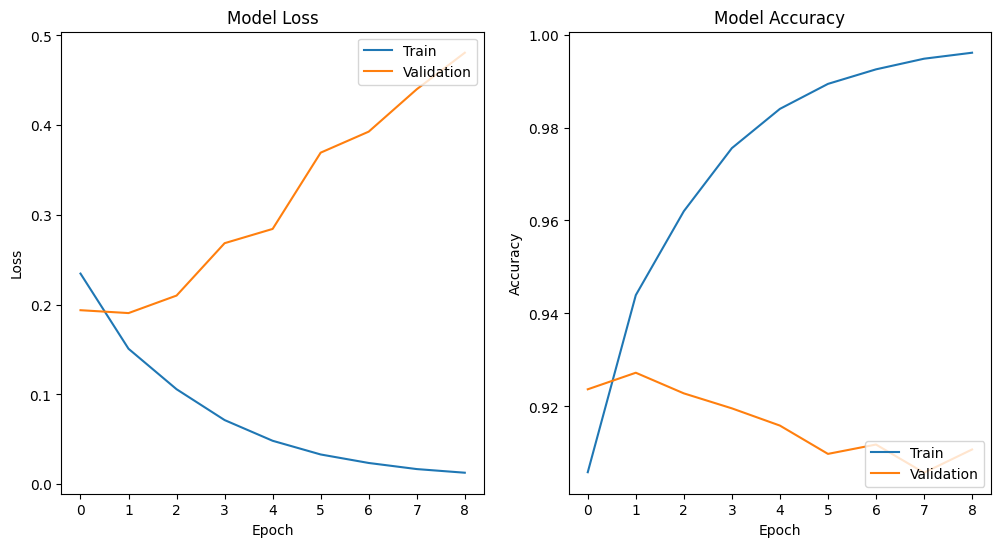

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()

In [ ]:
loss, accuracy = model.evaluate(np.array(X_test.tolist()), np.array(y_test))
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

3125/3125 [==============================] - 27s 9ms/step - loss: 0.1914 - accuracy: 0.9277
Test Loss: 0.1914, Test Accuracy: 0.9277


In [ ]:
amz = pd.read_csv(r'/content/rev.csv')
amz.head()

,review,label
0,Next Gen Console a love letter to the customer...,0
1,"Very good I was very hesitant getting this, af...",0
2,Very nice... I love size of this thing. It is ...,0
3,My son now stays home in evenings. OK so I'm a...,0
4,The best value in gaming right now I usually l...,0


In [ ]:
amz['label'] = amz['label'].replace({0: 1, 1: 0})
amz.head()

,review,label
0,Next Gen Console a love letter to the customer...,1
1,"Very good I was very hesitant getting this, af...",1
2,Very nice... I love size of this thing. It is ...,1
3,My son now stays home in evenings. OK so I'm a...,1
4,The best value in gaming right now I usually l...,1


In [ ]:
amz['final'] = amz['review'].apply(preprocess_text)
amz.head()

,review,label,final
0,Next Gen Console a love letter to the customer...,1,"[1, 578, 1153, 5081, 1, 2480, 209, 34880, 247,..."
1,"Very good I was very hesitant getting this, af...",1,"[30, 31, 3, 11743, 30, 5829, 278, 8, 78, 148, ..."
2,Very nice... I love size of this thing. It is ...,1,"[30, 193, 3, 79, 389, 7, 8, 162, 6, 9, 26, 247..."
3,My son now stays home in evenings. OK so I'm a...,1,"[21, 408, 107, 517, 343, 10, 3004, 401, 26, 12..."
4,The best value in gaming right now I usually l...,1,"[1, 87, 634, 10, 4134, 190, 107, 3, 710, 32, 5..."


In [ ]:
loss, accuracy = model.evaluate(np.array(amz['final'].tolist()), np.array(amz['label']))

4/4 [==============================] - 1s 30ms/step - loss: 0.3222 - accuracy: 0.8833


In [ ]:
from sklearn.metrics import confusion_matrix
# Calculate confusion matrices for train and test data
y_train_pred = model.predict(np.array(X_train.tolist()))
y_test_pred = model.predict(np.array(X_test.tolist()))

# Convert predicted probabilities to binary labels
y_train_pred_labels = (y_train_pred > 0.5).astype(int)
y_test_pred_labels = (y_test_pred > 0.5).astype(int)

# Calculate confusion matrices
confusion_matrix_train = confusion_matrix(y_train, y_train_pred_labels)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred_labels)

print("Confusion Matrix for Train Data:")
print(confusion_matrix_train)
print("\nConfusion Matrix for Test Data:")
print(confusion_matrix_test)

3125/3125 [==============================] - 37s 12ms/step
Confusion Matrix for Train Data:
[[434794  15150]
 [ 19829 430211]]

Confusion Matrix for Test Data:
[[46767  3255]
 [ 3843 46134]]


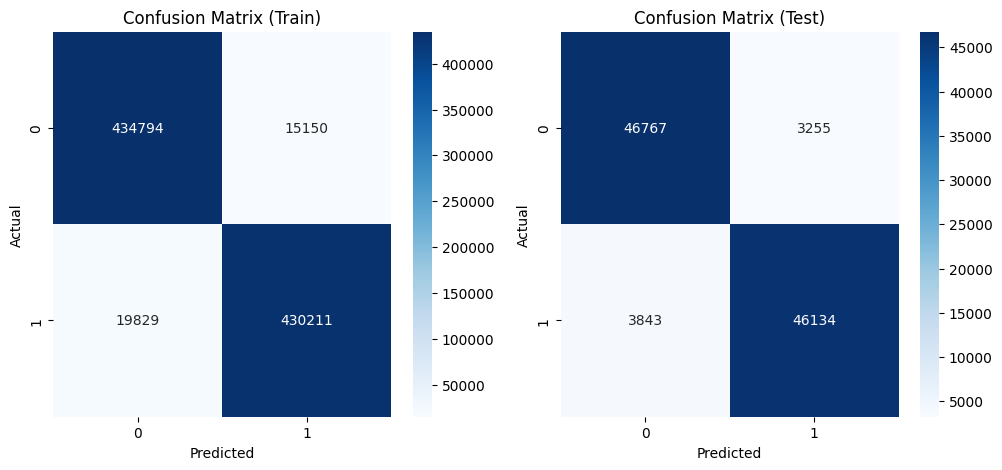

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the confusion matrix data
confusion_matrix_train = [[434794, 15150], [19829, 430211]]
confusion_matrix_test = [[46767, 3255], [3843, 46134]]

# Create subplots for train and test confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot train confusion matrix
sns.heatmap(confusion_matrix_train, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix (Train)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot test confusion matrix
sns.heatmap(confusion_matrix_test, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix (Test)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.show()


In [ ]:
loss_amz, accuracy_amz = model.evaluate(np.array(amz['final'].tolist()), np.array(amz['label']))
print("\nEvaluation on 'amz' dataset:")
print(f"Loss: {loss_amz:.4f}, Accuracy: {accuracy_amz:.4f}")

# Calculate confusion matrix for 'amz' dataset
y_amz_pred = model.predict(np.array(amz['final'].tolist()))
y_amz_pred_labels = (y_amz_pred > 0.5).astype(int)
confusion_matrix_amz = confusion_matrix(amz['label'], y_amz_pred_labels)

print("\nConfusion Matrix for 'amz' Dataset:")
print(confusion_matrix_amz)

4/4 [==============================] - 0s 24ms/step - loss: 0.2450 - accuracy: 0.9167

Evaluation on 'amz' dataset:
Loss: 0.2450, Accuracy: 0.9167
4/4 [==============================] - 0s 25ms/step

Confusion Matrix for 'amz' Dataset:
[[58  2]
 [ 8 52]]


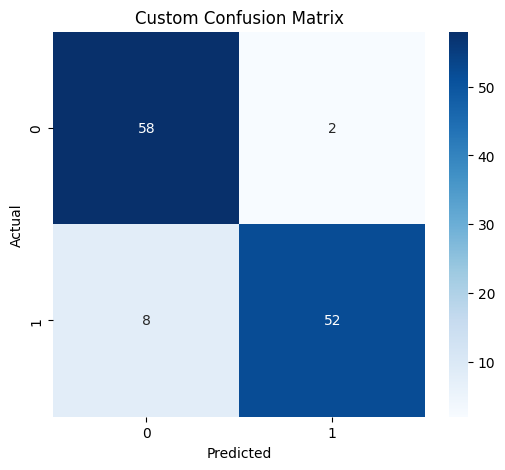

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the confusion matrix data
confusion_matrix_custom = [[58, 2], [8, 52]]

# Create a subplot for the custom confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix_custom, annot=True, fmt='d', cmap='Blues')
plt.title('Custom Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
